<a href="https://colab.research.google.com/github/Falih-Muafi-Misbahuddin/image-classification-pinang-sirih-kapur/blob/main/WebAPP_Classification_Pinang_Sirih_Kapur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 8.7 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 212 kB 74.4 MB/s 
     |████████████████████████████████| 84 kB 4.9 MB/s 
     |████████████████████████████████| 2.3 MB 58.2 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 275 kB 68.8 MB/s 
     |████████████████████████████████| 141 kB 69.7 MB/s 
     |████████████████████████████████| 57 kB 6.0 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 80 kB 11.1 MB/s 
     |████████████████████████████████| 68 kB 8.4 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 4.1 MB 51.7 MB/s 
     |████████████████████████████████| 856 kB 71

In [3]:
import gradio as gr

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:

data_dir = '/content/drive/MyDrive/image pinang sirih kapur'
print(data_dir)

/content/drive/MyDrive/image pinang sirih kapur


In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 210 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 90 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['kapur', 'pinang', 'sirih']


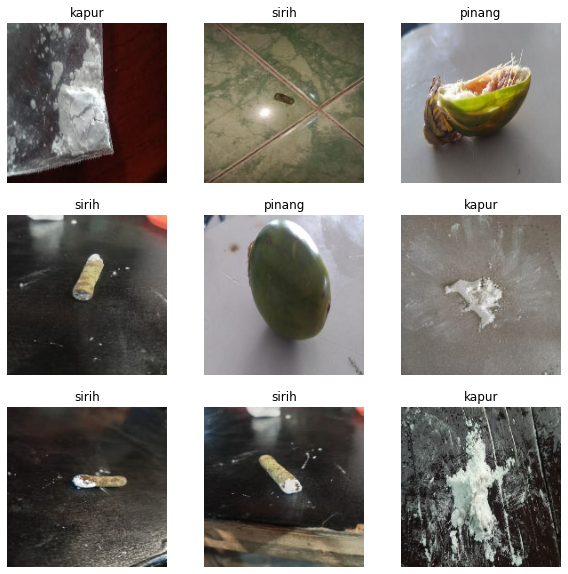

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 20s 1s/step - loss: 1.0482 - accuracy: 0.5286 - val_loss: 0.7025 - val_accuracy: 0.6556
Epoch 2/10
7/7 [==============================] - 1s 62ms/step - loss: 0.4793 - accuracy: 0.7905 - val_loss: 0.4541 - val_accuracy: 0.7222
Epoch 3/10
7/7 [==============================] - 1s 59ms/step - loss: 0.2699 - accuracy: 0.9000 - val_loss: 0.2230 - val_accuracy: 0.9000
Epoch 4/10
7/7 [==============================] - 1s 58ms/step - loss: 0.1458 - accuracy: 0.9619 - val_loss: 0.1684 - val_accuracy: 0.9333
Epoch 5/10
7/7 [==============================] - 1s 62ms/step - loss: 0.1812 - accuracy: 0.9476 - val_loss: 0.1766 - val_accuracy: 0.9444
Epoch 6/10
7/7 [==============================] - 1s 56ms/step - loss: 0.0915 - accuracy: 0.9810 - val_loss: 0.1776 - val_accuracy: 0.9333
Epoch 7/10
7/7 [==============================] - 1s 60ms/step - loss: 0.0459 - accuracy: 0.9952 - val_loss: 0.1298 - val_accuracy: 0.9556
Epoch 8/10
7/7 [=======================

In [13]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
  
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://37357.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
